In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
% matplotlib inline

from ddpg_agent import Agent

In [2]:
env = gym.make("BipedalWalker-v2")
env.seed(10)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)

In [3]:
def ddpg(n_episodes=1000, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done: break
        scores_deque.append(score)
        scores.append(score)
        print("\rEpisode {}\t Average score:{:.2f}\t score:{:.2f}".format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), "checkpoint_actor.pth")
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print("\rEpisode {} \t Average score:{:.2f}".format(i_episode, np.mean(scores_deque)))
    return scores
    


Episode 100 	 Average score:-117.99
Episode 200 	 Average score:-117.74
Episode 300 	 Average score:-117.95
Episode 400 	 Average score:-118.27
Episode 500 	 Average score:-117.86
Episode 600 	 Average score:-117.96
Episode 700 	 Average score:-118.24
Episode 800 	 Average score:-118.28
Episode 900 	 Average score:-117.48
Episode 1000 	 Average score:-118.53


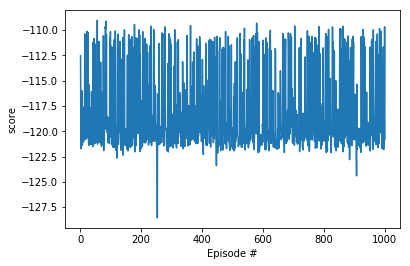

In [4]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel("score")
plt.xlabel("Episode #")
plt.show()

In [5]:
agent.actor_local.load_state_dict(torch.load("checkpoint_actor.pth"))
agent.critic_local.load_state_dict(torch.load("checkpoint_critic.pth"))

state = env.reset()
agent.reset()   
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break
        
env.close()